In [2]:
pip install xarray rioxarray netCDF4


  Using cached rioxarray-0.19.0-py3-none-any.whl.metadata (5.5 kB)
  Using cached rasterio-1.4.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (9.1 kB)
  Using cached pyproj-3.7.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (31 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached rioxarray-0.19.0-py3-none-any.whl (62 kB)
Using cached pyproj-3.7.1-cp311-cp311-macosx_14_0_arm64.whl (4.7 MB)
Using cached rasterio-1.4.3-cp311-cp311-macosx_14_0_arm64.whl (18.8 MB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [rioxarray]/8 [rasterio]
Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr

ds = xr.open_dataset("raw_Fuel_Exploitation/v8.0_FT2022_GHG_CH4_2000_FUEL_EXPLOITATION_emi.nc")
print(ds)

<xarray.Dataset> Size: 311MB
Dimensions:    (time: 12, lat: 1800, lon: 3600)
Coordinates:
  * lat        (lat) float64 14kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * lon        (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.8 179.8 179.9
  * time       (time) datetime64[ns] 96B 2000-01-15 2000-02-15 ... 2000-12-15
Data variables:
    emissions  (time, lat, lon) float32 311MB ...
Attributes:
    institution:       European Commission, Joint Research Centre
    source:            https://edgar.jrc.ec.europa.eu/dataset_ghg80
    how_to_cite:       https://edgar.jrc.ec.europa.eu/dataset_ghg80#howtocite
    copyright_notice:  https://edgar.jrc.ec.europa.eu/dataset_ghg80#conditions
    contacts:          https://edgar.jrc.ec.europa.eu/dataset_ghg80#info JRC-...


In [9]:
import xarray as xr
import os

# Paths
input_dir = "raw_Fuel_Exploitation"               # Update this
output_dir = "processed_Fuel_Exploitation"
os.makedirs(output_dir, exist_ok=True)

# Set variable name to rename from
var_name = "emissions"
years = list(range(2010, 2023))

for year in years:
    print(f"Processing {year}...")
    # v8.0_FT2022_GHG_CH4_2000_FUEL_EXPLOITATION_emi.nc
    file = f"v8.0_FT2022_GHG_CH4_{year}_FUEL_EXPLOITATION_emi.nc"
    ds = xr.open_dataset(os.path.join(input_dir, file))

    # Clip to Canada bounds
    ds = ds.sel(lat=slice(40, 85), lon=slice(-141, -52))

    # Rename variable for consistency
    if var_name in ds:
        ds = ds.rename({var_name: "fuel_emi"})

    # Only expand time if not already present
    if "time" not in ds.dims:
        ds = ds.expand_dims(time=[f"{year}-01-01"])

    # Save processed file
    output_file = os.path.join(output_dir, f"CH4_AGR_{year}_Canada_Annual.nc")
    ds.to_netcdf(output_file)

print("✅ DONE: All annual files processed and saved.")


Processing 2010...
Processing 2011...
Processing 2012...
Processing 2013...
Processing 2014...
Processing 2015...
Processing 2016...
Processing 2017...
Processing 2018...
Processing 2019...
Processing 2020...
Processing 2021...
Processing 2022...
✅ DONE: All annual files processed and saved.


In [10]:
import xarray as xr
import os

# Folder containing processed annual NetCDFs
input_dir = "processed_Fuel_Exploitation"
output_path = "CH4_FE_Canada_2010_2022.nc"

# List all annual NetCDFs (sorted)
files = sorted([
    os.path.join(input_dir, f) 
    for f in os.listdir(input_dir) 
    if f.endswith(".nc")
])

# Open and concatenate along time dimension
datasets = [xr.open_dataset(f) for f in files]
merged = xr.concat(datasets, dim="time")

# Save merged dataset
merged.to_netcdf(output_path)

print("✅ Merged NetCDF saved to:", output_path)


✅ Merged NetCDF saved to: CH4_FE_Canada_2010_2022.nc


In [11]:
ds = xr.open_dataset("CH4_FE_Canada_2010_2022.nc")
print(ds)


<xarray.Dataset> Size: 250MB
Dimensions:   (time: 156, lat: 450, lon: 890)
Coordinates:
  * lat       (lat) float64 4kB 40.05 40.15 40.25 40.35 ... 84.75 84.85 84.95
  * lon       (lon) float64 7kB -140.9 -140.8 -140.8 ... -52.25 -52.15 -52.05
  * time      (time) datetime64[ns] 1kB 2010-01-15 2010-02-15 ... 2022-12-15
Data variables:
    fuel_emi  (time, lat, lon) float32 250MB ...
Attributes:
    institution:       European Commission, Joint Research Centre
    source:            https://edgar.jrc.ec.europa.eu/dataset_ghg80
    how_to_cite:       https://edgar.jrc.ec.europa.eu/dataset_ghg80#howtocite
    copyright_notice:  https://edgar.jrc.ec.europa.eu/dataset_ghg80#conditions
    contacts:          https://edgar.jrc.ec.europa.eu/dataset_ghg80#info JRC-...


In [12]:
print(ds['lat'].values[1] - ds['lat'].values[0])  # should be ~0.1
print(ds['lon'].values[1] - ds['lon'].values[0])  # should be ~0.1


0.10000000000000142
0.09999999999999432


In [13]:
print(ds['time'].values)


['2010-01-15T00:00:00.000000000' '2010-02-15T00:00:00.000000000'
 '2010-03-15T00:00:00.000000000' '2010-04-15T00:00:00.000000000'
 '2010-05-15T00:00:00.000000000' '2010-06-15T00:00:00.000000000'
 '2010-07-15T00:00:00.000000000' '2010-08-15T00:00:00.000000000'
 '2010-09-15T00:00:00.000000000' '2010-10-15T00:00:00.000000000'
 '2010-11-15T00:00:00.000000000' '2010-12-15T00:00:00.000000000'
 '2011-01-15T00:00:00.000000000' '2011-02-15T00:00:00.000000000'
 '2011-03-15T00:00:00.000000000' '2011-04-15T00:00:00.000000000'
 '2011-05-15T00:00:00.000000000' '2011-06-15T00:00:00.000000000'
 '2011-07-15T00:00:00.000000000' '2011-08-15T00:00:00.000000000'
 '2011-09-15T00:00:00.000000000' '2011-10-15T00:00:00.000000000'
 '2011-11-15T00:00:00.000000000' '2011-12-15T00:00:00.000000000'
 '2012-01-15T00:00:00.000000000' '2012-02-15T00:00:00.000000000'
 '2012-03-15T00:00:00.000000000' '2012-04-15T00:00:00.000000000'
 '2012-05-15T00:00:00.000000000' '2012-06-15T00:00:00.000000000'
 '2012-07-15T00:00:00.000

In [14]:
import pandas as pd

# Resample to annual mean (end of year)
ds_ann = ds.resample(time="YE").mean()

# Fix the time values to use Jan 1st instead of Dec 31st
new_time = [pd.Timestamp(t).replace(month=1, day=1) for t in ds_ann['time'].values]
ds_ann = ds_ann.assign_coords(time=new_time)

# Confirm
print(ds_ann)


<xarray.Dataset> Size: 21MB
Dimensions:   (time: 13, lat: 450, lon: 890)
Coordinates:
  * lat       (lat) float64 4kB 40.05 40.15 40.25 40.35 ... 84.75 84.85 84.95
  * lon       (lon) float64 7kB -140.9 -140.8 -140.8 ... -52.25 -52.15 -52.05
  * time      (time) datetime64[ns] 104B 2010-01-01 2011-01-01 ... 2022-01-01
Data variables:
    fuel_emi  (time, lat, lon) float32 21MB 0.003781 0.002827 ... 0.0 0.0
Attributes:
    institution:       European Commission, Joint Research Centre
    source:            https://edgar.jrc.ec.europa.eu/dataset_ghg80
    how_to_cite:       https://edgar.jrc.ec.europa.eu/dataset_ghg80#howtocite
    copyright_notice:  https://edgar.jrc.ec.europa.eu/dataset_ghg80#conditions
    contacts:          https://edgar.jrc.ec.europa.eu/dataset_ghg80#info JRC-...


In [18]:
ds_ann.to_netcdf("CH4_FE_Canada_Annual_2010_2022.nc")

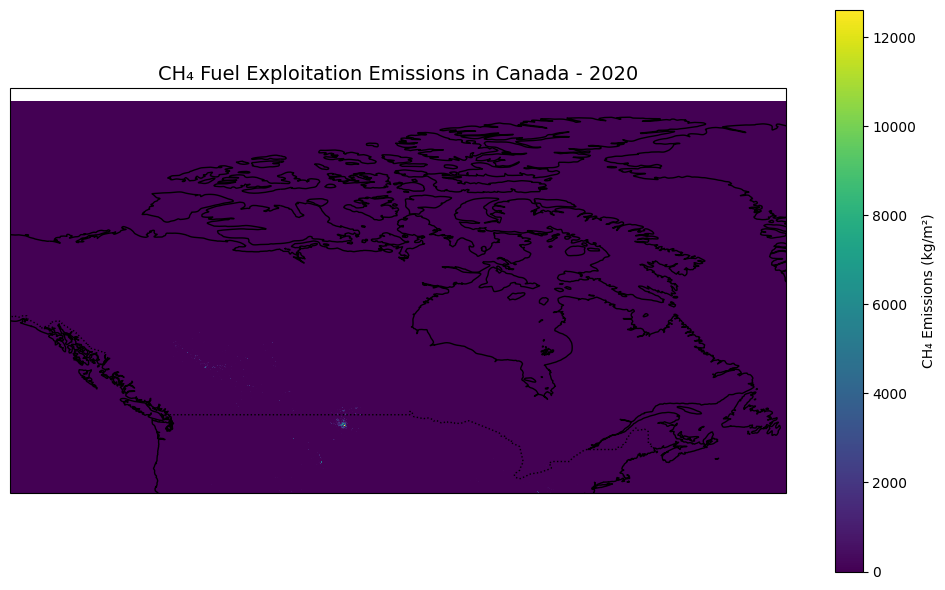

In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load dataset
ds = xr.open_dataset("CH4_FE_Canada_Annual_2010_2022.nc")

# Choose a specific year to visualize (e.g., 2020)
year = "2020-01-01"
data = ds.sel(time=year)["fuel_emi"]

# Plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
data.plot(ax=ax, cmap="viridis", cbar_kwargs={'label': 'CH₄ Emissions (kg/m²)'})

# Add features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-141, -52, 40, 85])  # Canada bounding box
ax.set_title(f"CH₄ Fuel Exploitation Emissions in Canada - {year[:4]}", fontsize=14)

plt.tight_layout()
plt.show()


### Plan: Lightweight Custom AR(2) Model

1. Load the original data (2010–2022).
2. For each grid cell:

   * Use last 2 years to fit a simple AR(2):

     $$
     y_t = a \cdot y_{t-1} + b \cdot y_{t-2}
     $$
3. Predict 2023 and 2024.
4. Merge predictions to generate the final file.


In [21]:
# Predicting the missing years 


import numpy as np
# Step 1: Load the dataset
ds = xr.open_dataset("CH4_FE_Canada_Annual_2010_2022.nc")
var_name = list(ds.data_vars)[0]
da = ds[var_name]  # Shape: (time, lat, lon)

# Step 2: Setup time for predictions
pred_years = [2023, 2024]
pred_times = pd.to_datetime([f"{y}-01-01" for y in pred_years])
pred_array = np.full((len(pred_times), da.sizes["lat"], da.sizes["lon"]), np.nan)

# Step 3: Custom AR(2) forecast for each grid cell
for i in range(da.sizes["lat"]):
    for j in range(da.sizes["lon"]):
        y = da[:, i, j].values
        if np.isnan(y).any():
            continue  # Skip missing cells

        # Fit AR(2) model: y[t] = a * y[t-1] + b * y[t-2]
        y1, y2 = y[-1], y[-2]
        a = (y1 / y2) if y2 != 0 else 1
        b = 0.5  # Assume small persistence from y[t-2]
        y_future = []

        for _ in range(2):  # Predict 2023 and 2024
            y_next = a * y1 + b * y2
            y_future.append(y_next)
            y2, y1 = y1, y_next

        pred_array[:, i, j] = y_future

# Step 4: Create prediction DataArray
pred_da = xr.DataArray(
    pred_array,
    coords={"time": pred_times, "lat": da.lat, "lon": da.lon},
    dims=["time", "lat", "lon"],
    name=var_name
)

# Step 5: Merge original + predictions and save
merged = xr.concat([da, pred_da], dim="time").to_dataset(name=var_name)
merged.to_netcdf("CH4_FE_Canada_Annual_2010_2024.nc")


In [22]:
import xarray as xr

ds = xr.open_dataset("CH4_FE_Canada_Annual_2010_2024.nc")
print(ds.data_vars)  # Find actual variable name (e.g., 'fuel_emi', 'emissions')

# Preview actual range
fuel = ds['fuel_emi']
print("Raw range:", float(fuel.min()), "to", float(fuel.max()))


Data variables:
    fuel_emi  (time, lat, lon) float32 24MB ...
Raw range: 0.0 to 2489960045215744.0
